In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

In [6]:
data = pd.read_csv('D:\\BigDataAnalysis\\data\\DiamondsPrices.csv')
data.head(15)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [7]:
summary = data.describe()

# Tính toán giá trị mode (giá trị xuất hiện nhiều nhất) cho mỗi cột
mode_values = data.mode().iloc[0]  # Chỉ lấy dòng đầu tiên nếu có nhiều mode

# Thêm giá trị mode vào bảng tóm lược
summary.loc['mode'] = mode_values
summary

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000
mode,0.300000,62.000000,56.000000,605.000000,4.370000,4.340000,2.700000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
# Kiểm tra các dòng bị trùng lặp
duplicates = data[data.duplicated()]
duplicates

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [11]:
# Xóa các dòng trùng lặp, giữ lại dòng đầu tiên
data = data.drop_duplicates()
print(data.shape)

(53794, 10)


<Axes: xlabel='cut', ylabel='count'>

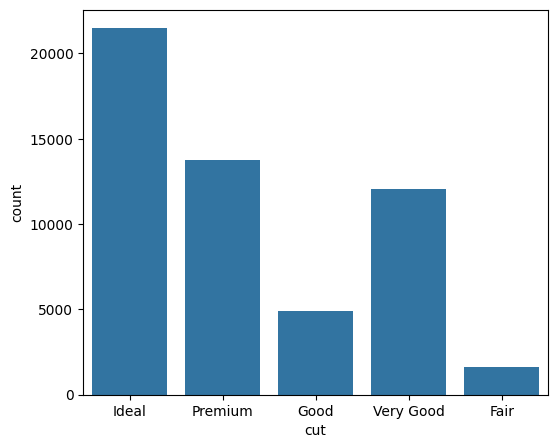

In [12]:
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='cut')

<Axes: xlabel='color', ylabel='count'>

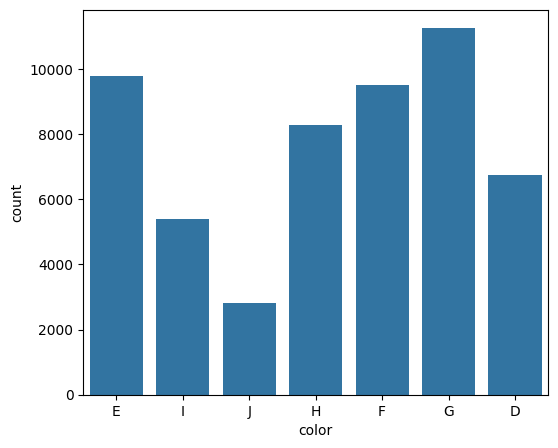

In [13]:
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='color')

<Axes: xlabel='clarity', ylabel='count'>

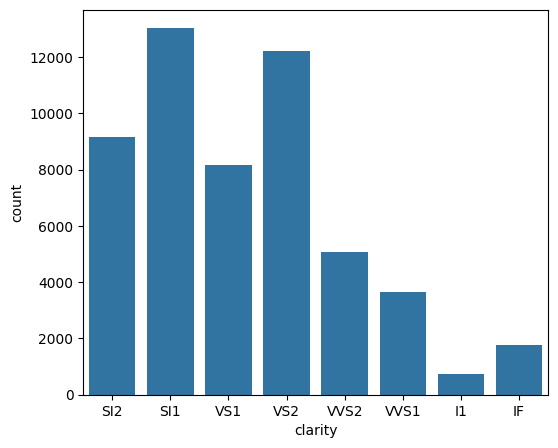

In [14]:
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='clarity')

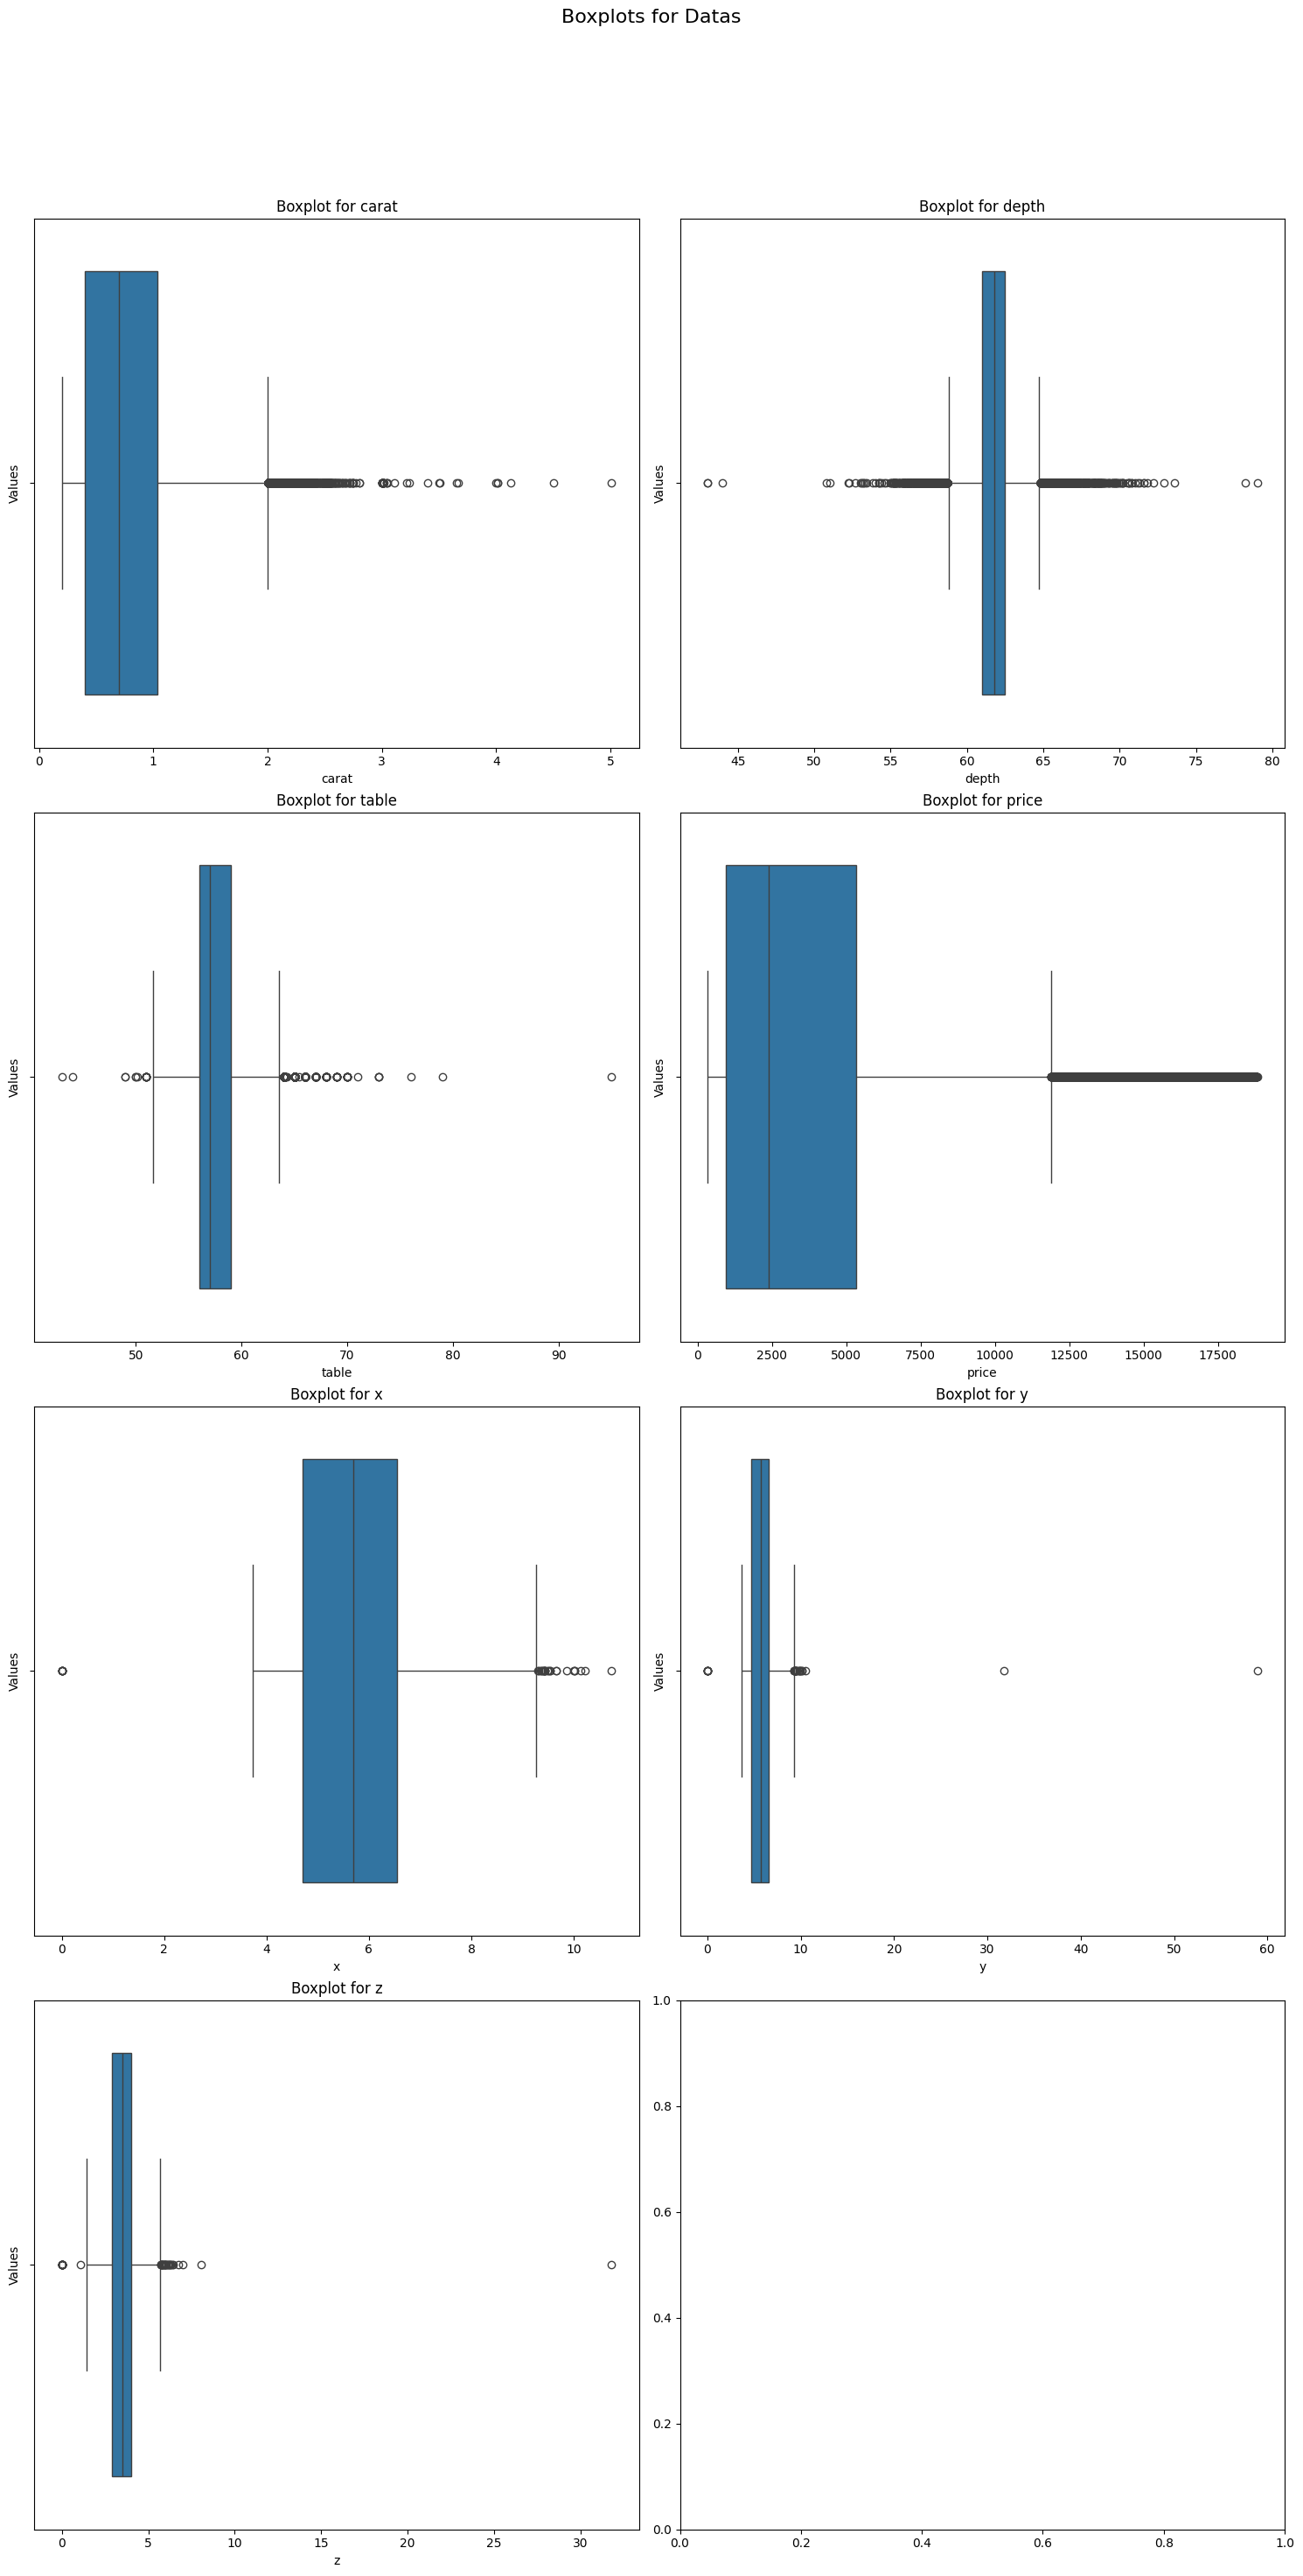

In [15]:
fig, axes = plt.subplots(4, 2, figsize=(15, 30))  # 2 hàng và 3 cột

# Lặp qua từng cột của DataFrame và vẽ boxplot vào từng axes
for i, column in enumerate(data.select_dtypes("number").columns):
    ax = axes[i // 2, i % 2]  # Xác định vị trí subplot
    sns.boxplot(x=data[column], ax=ax)
    ax.set_title(f"Boxplot for {column}")
    ax.set_ylabel("Values")

# Thêm tiêu đề cho toàn bộ biểu đồ
fig.suptitle("Boxplots for Datas", fontsize=16)
plt.tight_layout()  # Tự động điều chỉnh khoảng cách giữa các subplot
plt.subplots_adjust(top=0.9)  # Giảm khoảng cách với tiêu đề chính

# Hiển thị biểu đồ
plt.show()

In [16]:
df_numeric = data.select_dtypes(include=['number'])
df_categorical = data.select_dtypes(include=['object'])
df_numeric.columns, df_categorical.columns

(Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object'),
 Index(['cut', 'color', 'clarity'], dtype='object'))

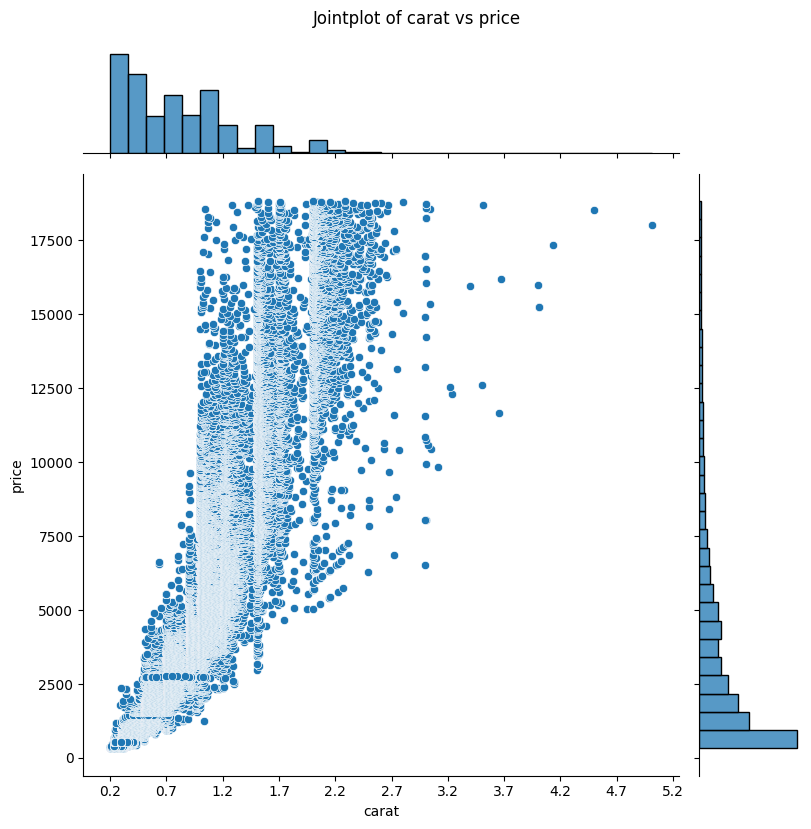

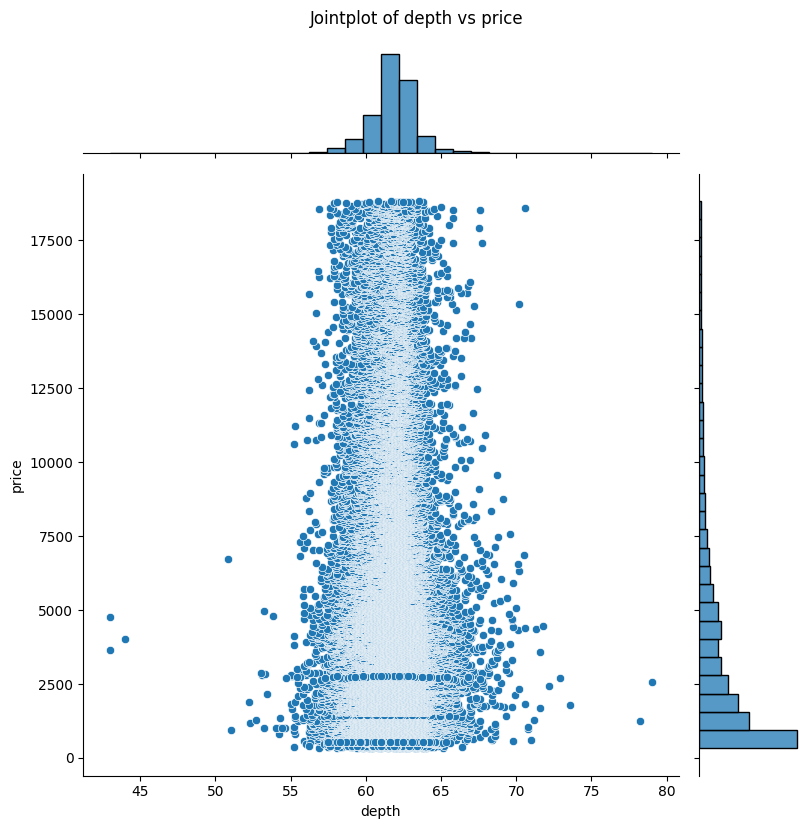

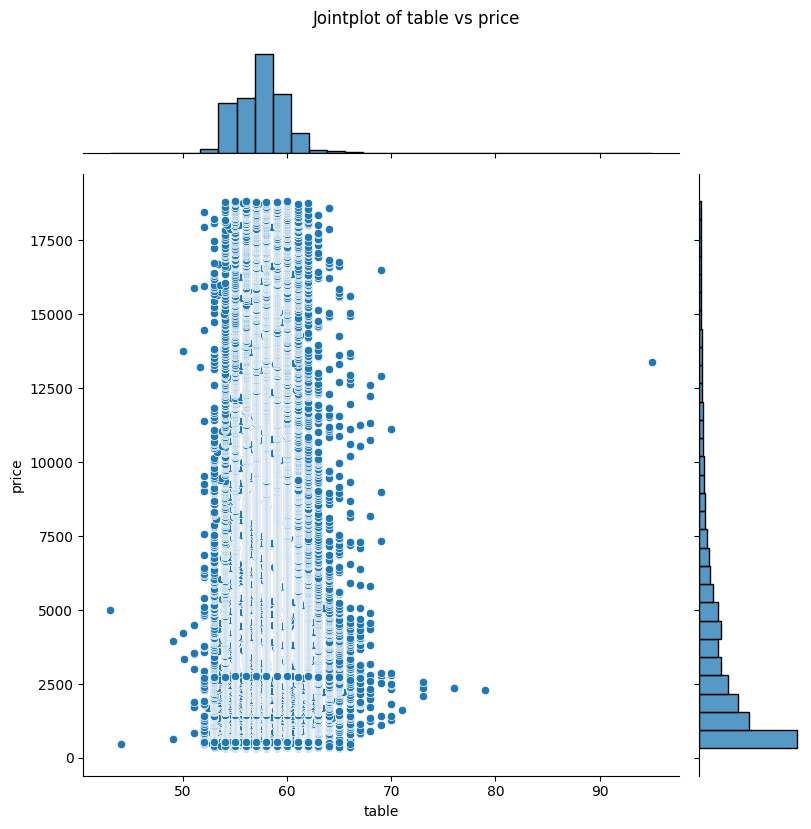

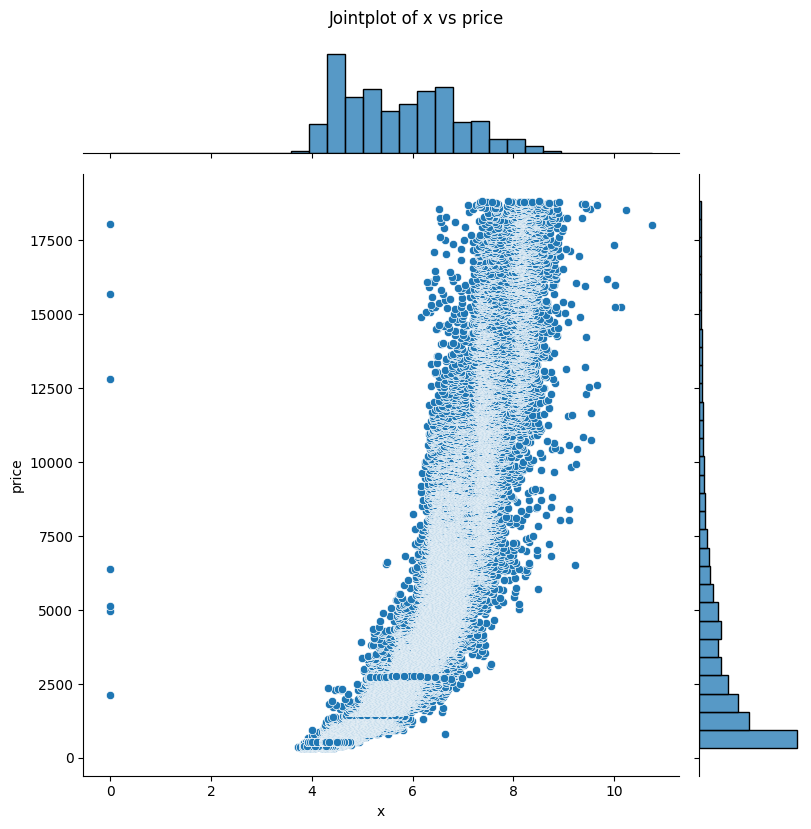

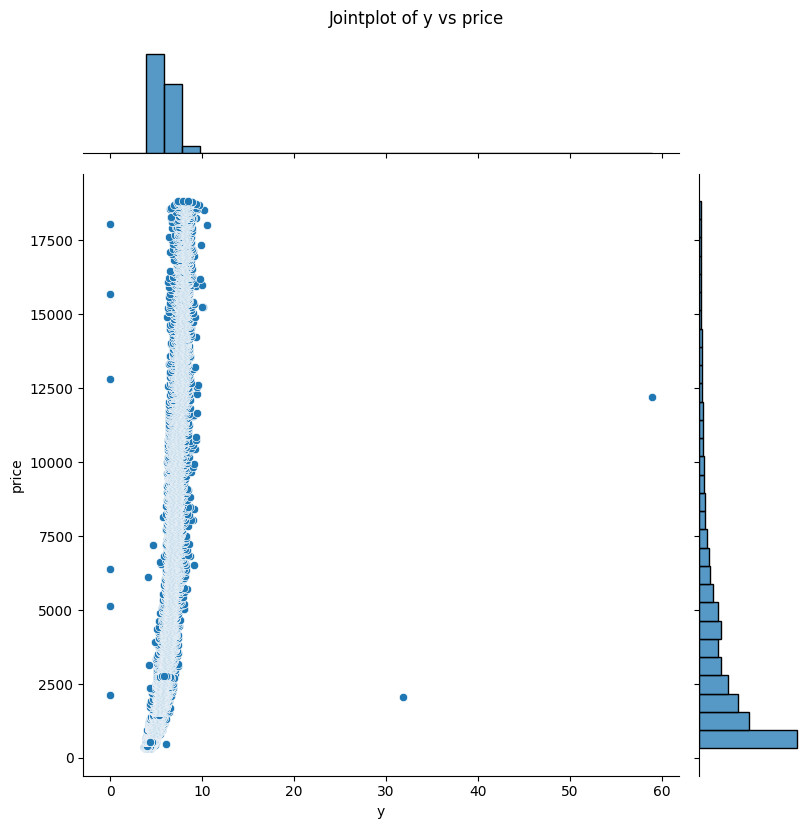

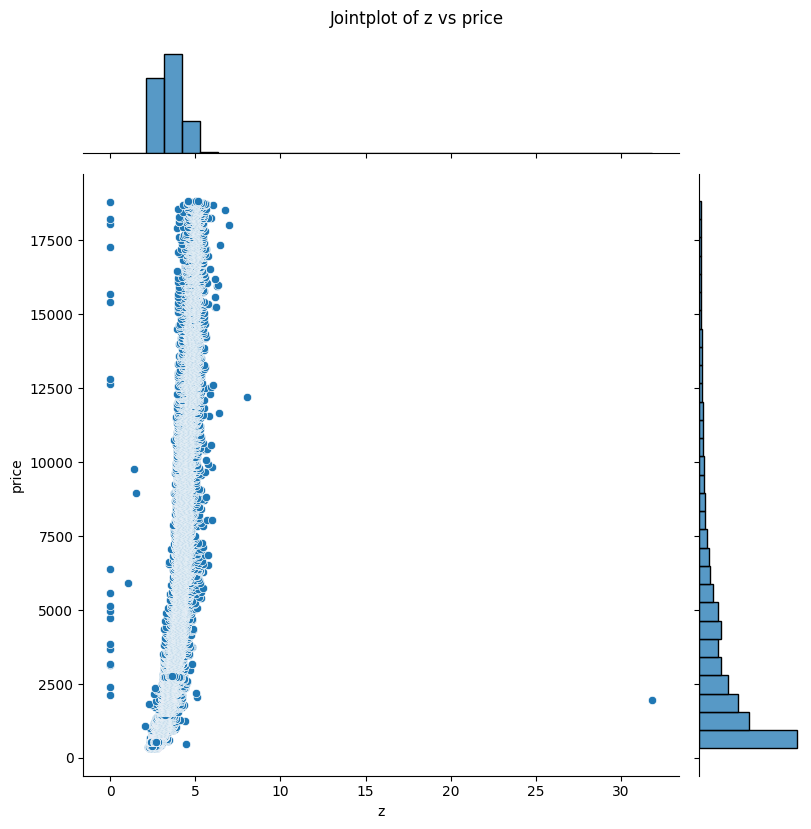

In [17]:
def draw_join_plot(df, col, target_columns):
    g = sns.jointplot(data=df, x=col, y=target_columns, kind='scatter', height=8,  marginal_kws={'bins': 30})

    if df[col].max() < 10:
        g.ax_joint.set_xticks(np.arange(df[col].min(), df[col].max() + 0.5, 0.5))  
    g.figure.suptitle(f'Jointplot of {col} vs {target_columns}', y=1.03)
    plt.show()
    
for col in df_numeric.columns:
    if col != 'price':
        draw_join_plot(df_numeric, col, target_columns='price')

C:\Users\Trung Nguyen\AppData\Local\Temp\ipykernel_9732\2843674158.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=col, y='price', data=data, palette="muted")


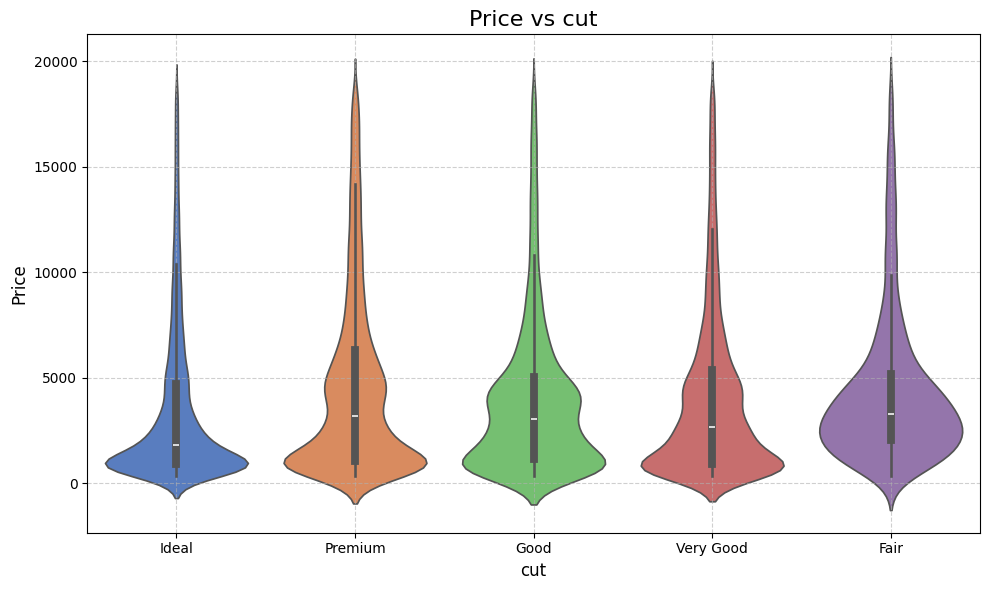

C:\Users\Trung Nguyen\AppData\Local\Temp\ipykernel_9732\2843674158.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=col, y='price', data=data, palette="muted")


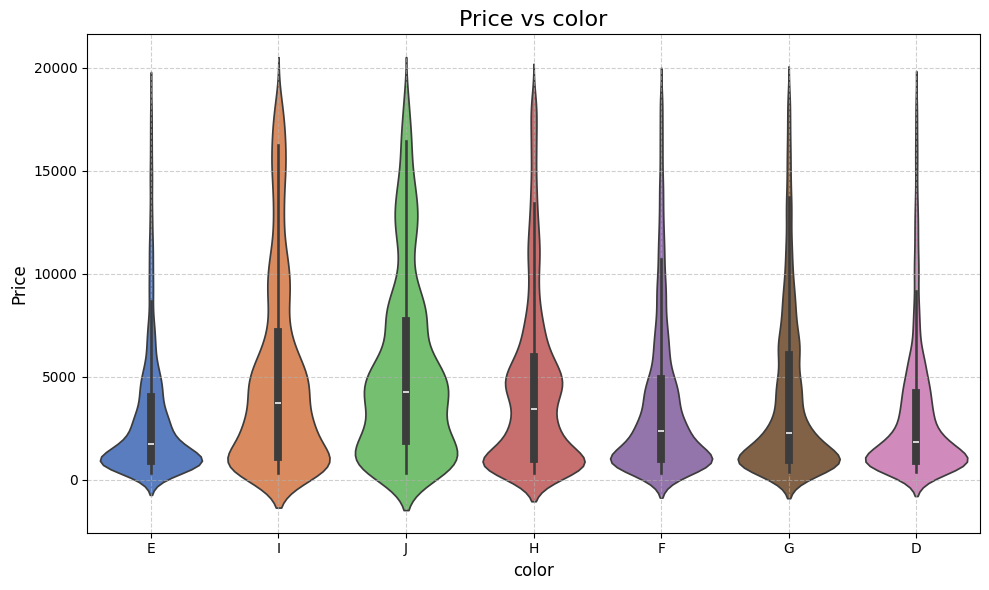

C:\Users\Trung Nguyen\AppData\Local\Temp\ipykernel_9732\2843674158.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=col, y='price', data=data, palette="muted")


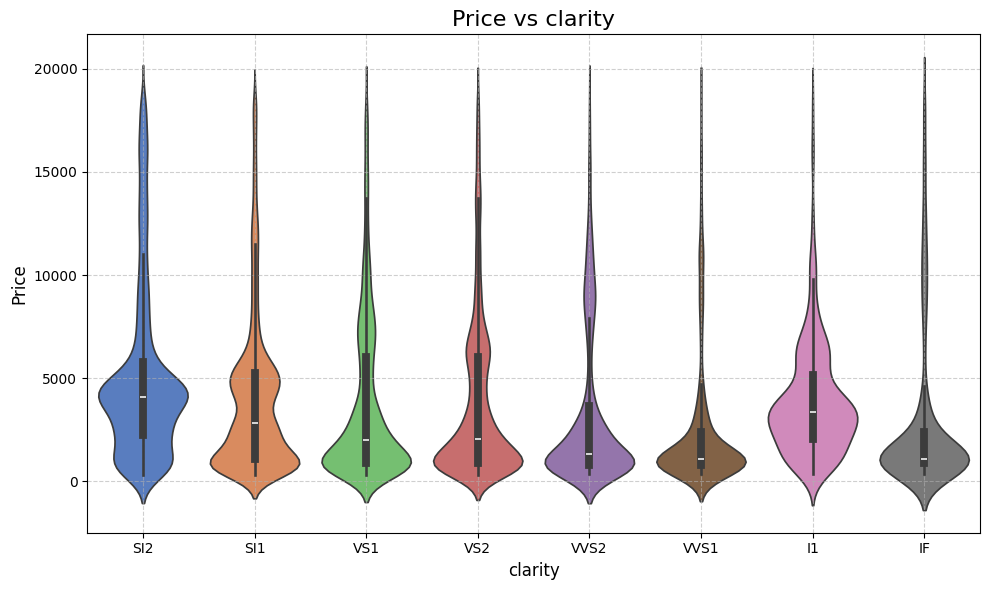

In [19]:
for col in df_categorical:
    plt.figure(figsize=(10, 6))
    if data[col].dtype == 'object':  # Nếu cột là dạng phân loại
        sns.violinplot(x=col, y='price', data=data, palette="muted")
    else:  # Nếu cột là dạng số
        sns.scatterplot(x=col, y='price', data=data, alpha=0.5)
    plt.title(f'Price vs {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.grid(visible=True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.tight_layout()
    plt.show()

In [21]:
# Khởi tạo LabelEncoder cho từng cột
encoders = {col: LabelEncoder() for col in ['cut', 'color', 'clarity']}

# Áp dụng LabelEncoder cho từng cột
for col, encoder in encoders.items():
    data[col] = encoder.fit_transform(data[col])

print(data)

       carat  cut  color  clarity  depth  table  price     x     y     z
0       0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1       0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2       0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3       0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4       0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
53935   0.72    2      0        2   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72    1      0        2   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70    4      0        2   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    3      4        3   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75    2      0        3   62.2   55.0   2757  5.83  5.87  3.64

[53794 rows x 10 columns]


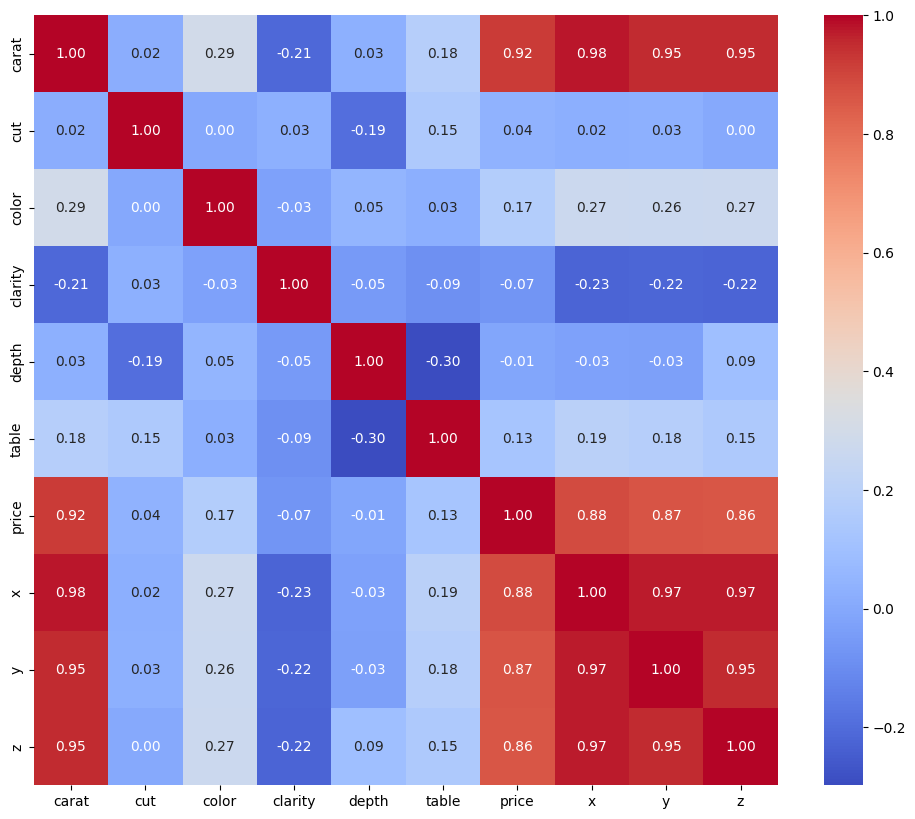

Các cặp biến có hệ số tương quan lớn hơn 0.5:
Variable 1 Variable 2  Correlation Coefficient
     price      carat                 0.921548
         x      carat                 0.975380
         y      carat                 0.951908
         z      carat                 0.953542
         x      price                 0.884504
         y      price                 0.865395
         z      price                 0.861208
         y          x                 0.974592
         z          x                 0.970686
         z          y                 0.951844

Các biến có ảnh hưởng lớn nhất tới 'price':
Variable  Correlation Coefficient
   carat                 0.921548
       x                 0.884504
       y                 0.865395
       z                 0.861208


In [22]:
def draw_heatmap(df):
    
    corr = df.corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.show()
    
    high_corr_pairs = []
    seen_pairs = set() 
    
    for col in corr.columns:
        for row in corr.index:
            if abs(corr.loc[row, col]) > 0.5 and row != col:
                # Sắp xếp cặp biến theo thứ tự để đảm bảo không bị trùng
                pair = tuple(sorted([row, col]))
                if pair not in seen_pairs:
                    seen_pairs.add(pair)
                    high_corr_pairs.append((row, col, corr.loc[row, col]))
    
    # Tạo dataframe cho các cặp biến có hệ số tương quan lớn hơn 0.5
    high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Variable 1", "Variable 2", "Correlation Coefficient"])
    
    # Trích xuất các biến có ảnh hưởng lớn nhất tới biến 'price'
    price_corr_df = pd.DataFrame(columns=["Variable", "Correlation Coefficient"])
    if 'price' in corr.columns:
        price_corr = corr['price'].drop('price')  # Loại bỏ chính nó
        price_corr_sorted = price_corr.abs().sort_values(ascending=False)
        
        # Chỉ lấy các biến có hệ số tương quan lớn hơn 0.5
        price_corr_df = pd.DataFrame(price_corr_sorted[price_corr_sorted > 0.5].items(), columns=["Variable", "Correlation Coefficient"])
        
    return high_corr_df, price_corr_df


# Giả sử df là DataFrame của bạn
high_corr_df, price_corr_df = draw_heatmap(data)

print("Các cặp biến có hệ số tương quan lớn hơn 0.5:")
print(high_corr_df.to_string(index=False))

print("\nCác biến có ảnh hưởng lớn nhất tới 'price':")
print(price_corr_df.to_string(index=False))

In [ ]:
import pandas as pd
import joblib
# Các cột cần chuẩn hóa
columns_to_normalize = ['carat', 'depth', 'table', 'x', 'y', 'z']
# Tạo đối tượng MinMaxScaler
scaler = MinMaxScaler(feature_range=(0.1, 0.9))
# Áp dụng MinMaxScaler
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
# Lưu scaler
joblib.dump(scaler, 'MinMaxscaler.pkl')
# Kiểm tra kết quả
print(data)


<ipython-input-27-7b48f9ddefcb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])


          carat  cut  color  clarity     depth     table  price         x  \
0      0.104990    2      1        3  0.511111  0.284615    326  0.394227   
1      0.101663    3      1        2  0.473333  0.376923    326  0.389758   
2      0.104990    1      1        4  0.408889  0.438462    327  0.401676   
3      0.114969    3      5        5  0.531111  0.330769    334  0.412849   
4      0.118295    1      6        3  0.551111  0.330769    335  0.423277   
...         ...  ...    ...      ...       ...       ...    ...       ...   
53935  0.186486    2      0        2  0.495556  0.315385   2757  0.528305   
53936  0.186486    1      0        2  0.546667  0.284615   2757  0.523836   
53937  0.183160    4      0        2  0.540000  0.361538   2757  0.521601   
53938  0.209771    3      4        3  0.500000  0.330769   2757  0.558101   
53939  0.191476    2      0        3  0.526667  0.284615   2757  0.534264   

              y         z  
0      0.154058  0.161132  
1      0.152156  0.

In [ ]:
data.to_csv('DiamondsPrices_scaler.csv', index=False)

print("Đã lưu DataFrame thành file csv.")

Đã lưu DataFrame thành file csv.


In [ ]:
x_data = data.drop('price', axis=True)
x_data

,carat,cut,color,clarity,depth,table,x,y,z
0,0.104990,2,1,3,0.511111,0.284615,0.394227,0.154058,0.161132
1,0.101663,3,1,2,0.473333,0.376923,0.389758,0.152156,0.158113
2,0.104990,1,1,4,0.408889,0.438462,0.401676,0.155280,0.158113
3,0.114969,3,5,5,0.531111,0.330769,0.412849,0.157453,0.166164
4,0.118295,1,6,3,0.551111,0.330769,0.423277,0.159083,0.169182
...,...,...,...,...,...,...,...,...,...
53935,0.186486,2,0,2,0.495556,0.315385,0.528305,0.178234,0.188050
53936,0.186486,1,0,2,0.546667,0.284615,0.523836,0.178098,0.190818
53937,0.183160,4,0,2,0.540000,0.361538,0.521601,0.177148,0.189560
53938,0.209771,3,4,3,0.500000,0.330769,0.558101,0.183124,0.194088


In [ ]:
y_data = data['price']
y_data

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [ ]:
x_train, x_val_test, y_train, y_val_test = train_test_split(x_data, y_data,test_size=0.2, random_state=42)

In [ ]:
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Xây dựng mô hình hồi quy tuyến tính
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

# Dự đoán trên tập kiểm tra
pred_y = lin_model.predict(x_test)

# Đánh giá mô hình trên tập kiểm tra
lin_mse_test = mean_squared_error(y_test, pred_y)
lin_rmse_test = np.sqrt(lin_mse_test)
lin_r2_test = r2_score(y_test, pred_y)

print(f"Test MSE: {lin_mse_test:.2f}")
print(f"Test RMSE: {lin_rmse_test:.2f}")
print(f"Test R²: {lin_r2_test:.2f}")

Test MSE: 1757928.10
Test RMSE: 1325.87
Test R²: 0.88


In [ ]:
# Dự đoán trên tập validation
pred_val = lin_model.predict(x_val)

# Đánh giá mô hình trên tập validation
lin_mse_val = mean_squared_error(y_val, pred_val)
lin_rmse_val = np.sqrt(lin_mse_val)
lin_r2_val = r2_score(y_val, pred_val)

print(f"Validation MSE: {lin_mse_val:.2f}")
print(f"Validation RMSE: {lin_rmse_val:.2f}")
print(f"Validation R²: {lin_r2_val:.2f}")

Validation MSE: 1687101.35
Validation RMSE: 1298.88
Validation R²: 0.89


In [ ]:
from sklearn.metrics import mean_absolute_error

# Tính giá trị trung bình của y_test
mean_y_test = np.mean(y_test)
mean_y_val = np.mean(y_val)

# Tính MAE, RAE, và RRSE cho tập kiểm tra
lin_mae_test = mean_absolute_error(y_test, pred_y)
lin_rae_test = (lin_mae_test / np.mean(np.abs(y_test - mean_y_test))) * 100  # Tính RAE %
lin_rrse_test = np.sqrt(lin_mse_test / np.mean((y_test - mean_y_test) ** 2)) * 100  # Tính RRSE %

# Tính MAE, RAE, và RRSE cho tập validation
lin_mae_val = mean_absolute_error(y_val, pred_val)
lin_rae_val = (lin_mae_val / np.mean(np.abs(y_val - mean_y_val))) * 100  # Tính RAE %
lin_rrse_val = np.sqrt(lin_mse_val / np.mean((y_val - mean_y_val) ** 2)) * 100  # Tính RRSE %

# In kết quả
print("Đánh giá trên tập kiểm tra:")
print(f"Test MAE: {lin_mae_test:.2f}")
print(f"Test RAE: {lin_rae_test:.2f} %")
print(f"Test RRSE: {lin_rrse_test:.2f} %")

print("\nĐánh giá trên tập validation:")
print(f"Validation MAE: {lin_mae_val:.2f}")
print(f"Validation RAE: {lin_rae_val:.2f} %")
print(f"Validation RRSE: {lin_rrse_val:.2f} %")

Đánh giá trên tập kiểm tra:
Test MAE: 841.48
Test RAE: 28.49 %
Test RRSE: 33.92 %

Đánh giá trên tập validation:
Validation MAE: 840.01
Validation RAE: 28.44 %
Validation RRSE: 33.31 %


In [ ]:
#  Hiển thị kết quả dự đoán và thực tế
results_test = pd.DataFrame({'Actual': y_test, 'Predicted': pred_y})
results_val = pd.DataFrame({'Actual': y_val, 'Predicted Validation': pred_val})

print("Kết quả trên tập kiểm tra:")
print(results_test.head())

print("\nKết quả trên tập validation:")
print(results_val.head())

Kết quả trên tập kiểm tra:
       Actual    Predicted
31605     368  -648.064955
40190    1120   -68.131776
44090    1554  1852.332271
38883    1050  1528.446290
34699     874   184.320909

Kết quả trên tập validation:
       Actual  Predicted Validation
18325    7454           7281.645704
16806    6702           4070.809350
46219    1752           2085.937472
51916    2436           1763.239803
31879     776            521.215142


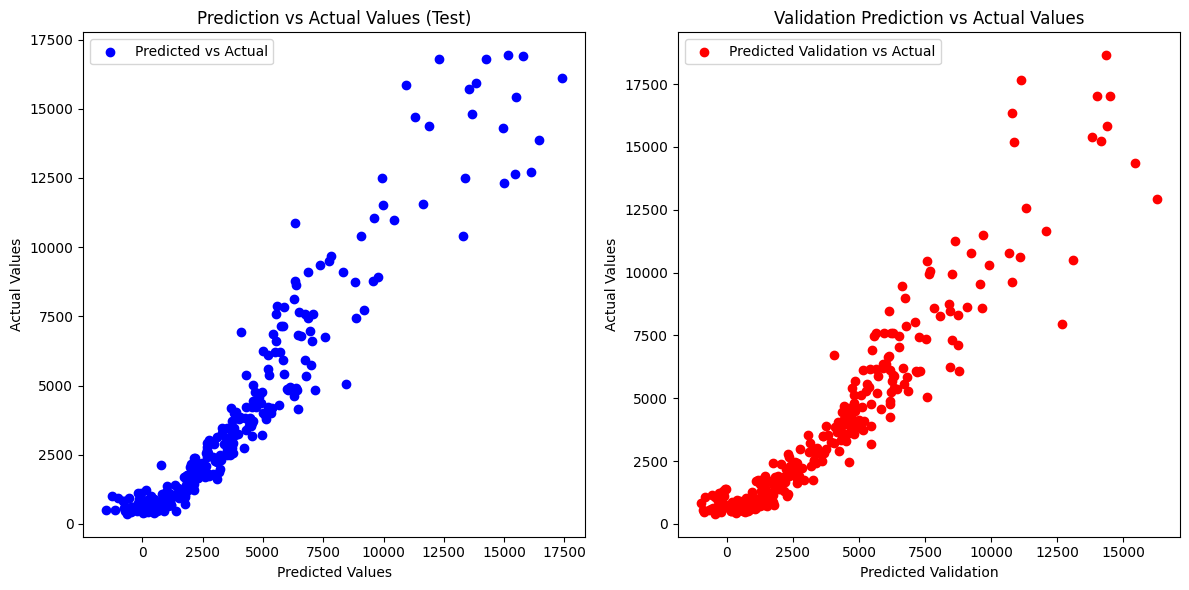

In [ ]:
#  Trực quan hóa kết quả
plt.figure(figsize=(12, 6))

# Biểu đồ dự đoán trên tập kiểm tra
plt.subplot(1, 2, 1)
plt.title('Prediction vs Actual Values (Test)')
plt.scatter(pred_y[:300], y_test[:300], color='blue', label='Predicted vs Actual')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()

# Biểu đồ dự đoán trên tập validation
plt.subplot(1, 2, 2)
plt.title('Validation Prediction vs Actual Values')
plt.scatter(pred_val[:300], y_val[:300], color='red', label='Predicted Validation vs Actual')
plt.xlabel('Predicted Validation')
plt.ylabel('Actual Values')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Hiển thị trọng số của từng thuộc tính
coefficients = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': lin_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("=== Hệ số của các thuộc tính ===")
print(coefficients)


=== Hệ số của các thuộc tính ===
   Feature   Coefficient
0    carat  65989.434495
8        z   4822.777906
7        y   1360.747716
3  clarity    285.339897
1      cut     72.635438
2    color   -266.031956
5    table  -6011.869723
4    depth  -7285.975896
6        x -16538.929077


In [ ]:
# Lấy Intercept
intercept = lin_model.intercept_

# In phương trình hồi quy tuyến tính
print("Phương trình hồi quy tuyến tính:")
equation = "Price = "
for feature, coef in zip(x_train.columns, lin_model.coef_):
    equation += f"{coef:.2f} * {feature} + "
equation += f"{intercept:.2f}"
print(equation)


Phương trình hồi quy tuyến tính:
Price = 65989.43 * carat + 72.64 * cut + -266.03 * color + 285.34 * clarity + -7285.98 * depth + -6011.87 * table + -16538.93 * x + 1360.75 * y + 4822.78 * z + 3447.29


In [ ]:
joblib.dump(lin_model, '/content/drive/MyDrive/PTDLL/linear_regression_python_model_final.pkl')

In [ ]:
# Đường dẫn đến file .pkl chứa mô hình
model_path = '/content/drive/MyDrive/PTDLL/linear_regression_python_model_final.pkl'

# Tải mô hình từ file
lin_model = joblib.load(model_path)


In [ ]:
# Sample test data with original values
sample_data = pd.DataFrame({
    'carat': [1.0, 0.5],
    'cut': [ 'Good', 'Premium'],  # Original values
    'color': [ 'G', 'H'],  # Original values
    'clarity': [ 'VS2', 'IF' ],  # Original values
    'depth': [62.0, 61.0],
    'table': [ 58.0, 56.5],
    'x': [ 6.5, 4.7],
    'y': [ 6.52, 4.72],
    'z': [ 4.0, 3.0]
})

# Khởi tạo LabelEncoder cho từng cột
encoders = {col: LabelEncoder() for col in ['cut', 'color', 'clarity']}

# Áp dụng LabelEncoder cho từng cột
for col, encoder in encoders.items():
    sample_data[col] = encoder.fit_transform(sample_data[col])

# Chuyển các cột original thành encoded values
columns_to_scale = ['carat', 'depth', 'table', 'x', 'y', 'z']
# Load scaler từ file
scaler_loaded = joblib.load('MinMaxscaler.pkl')
sample_data[columns_to_scale] = scaler_loaded.transform(sample_data[columns_to_scale])
sample_data

,carat,cut,color,clarity,depth,table,x,y,z
0,0.233056,0,0,1,0.522222,0.330769,0.584171,0.188557,0.200629
1,0.149896,1,1,0,0.500000,0.307692,0.450093,0.164109,0.175472


In [ ]:
# Dự đoán giá
predicted_prices = lin_model.predict(sample_data)
# Thêm giá trị dự đoán vào dataframe
sample_data['Predicted Price'] = predicted_prices
# In kết quả
print("=== Dự đoán giá kim cương với 2 ví dụ mẫu ===")
print(sample_data)

=== Dự đoán giá kim cương với 2 ví dụ mẫu ===
      carat  cut  color  clarity     depth     table         x         y  \
0  0.233056    0      0        1  0.522222  0.330769  0.584171  0.188557   
1  0.149896    1      1        0  0.500000  0.307692  0.450093  0.164109   

          z  Predicted Price  
0  0.200629      4881.033018  
1  0.175472      1278.170215  


Tương quan của các thuộc tính với giá kim cương:
price      1.000000
carat      0.921548
x          0.884504
y          0.865395
z          0.861208
color      0.171825
table      0.126566
cut        0.040196
depth     -0.011048
clarity   -0.071218
Name: price, dtype: float64


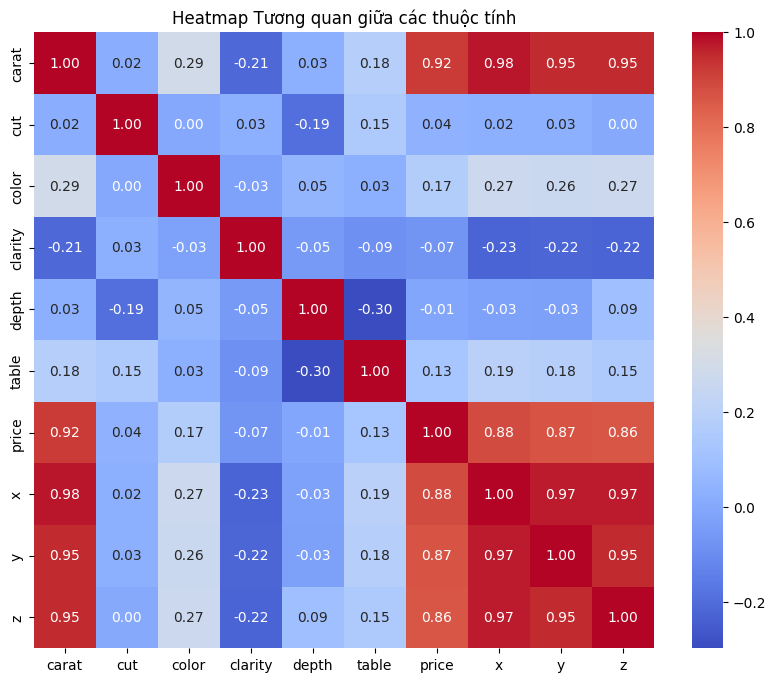

In [ ]:
# Tính ma trận tương quan
correlation_matrix = data.corr()

# Lấy tương quan với giá (price)
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print("Tương quan của các thuộc tính với giá kim cương:")
print(correlation_with_price)

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap Tương quan giữa các thuộc tính")
plt.show()


In [ ]:
# Lọc các thuộc tính có tương quan lớn hơn 0.5
important_features = correlation_with_price[correlation_with_price > 0.5].sort_values(ascending=False)

print("Các thuộc tính ảnh hưởng lớn nhất đến giá kim cương (tương quan > 0.5):")
print(important_features)

Các thuộc tính ảnh hưởng lớn nhất đến giá kim cương (tương quan > 0.5):
price    1.000000
carat    0.921548
x        0.884504
y        0.865395
z        0.861208
Name: price, dtype: float64


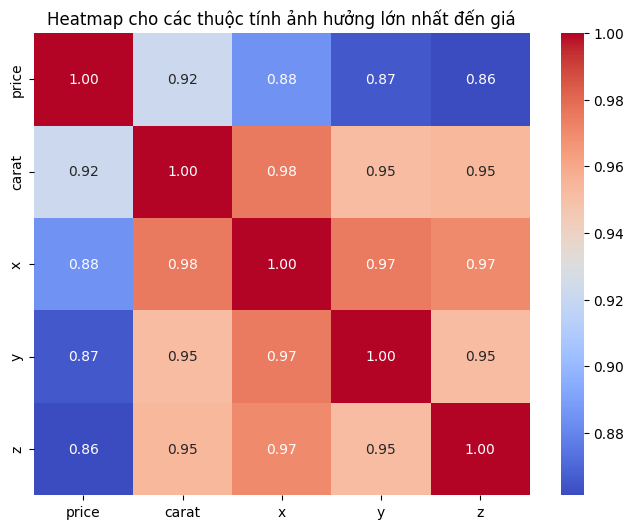

In [ ]:
# Lọc các thuộc tính quan trọng
important_features_names = important_features.index
important_correlation_matrix = correlation_matrix.loc[important_features_names, important_features_names]

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(important_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap cho các thuộc tính ảnh hưởng lớn nhất đến giá")
plt.show()


In [ ]:
# Lưu mô hình đã huấn luyện vào file .pkl
joblib.dump(lin_model, '/content/drive/MyDrive/PTDLL/linear_regression_python_model_final.pkl')

['/content/drive/MyDrive/PTDLL/linear_regression_python_model_final.pkl']

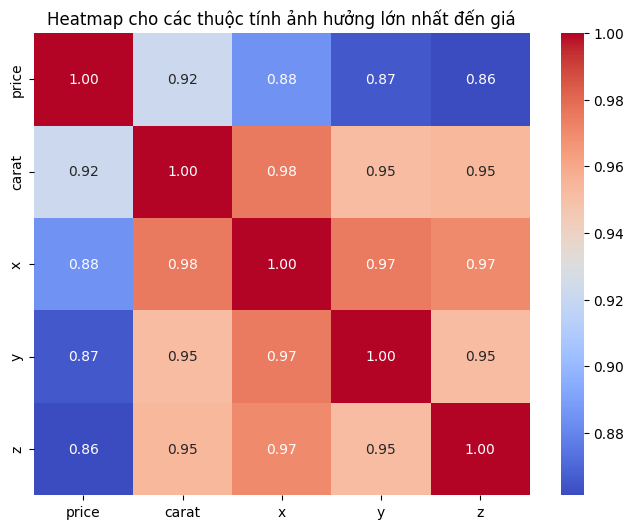

In [ ]:
# Lọc các thuộc tính quan trọng
important_features_names = important_features.index
important_correlation_matrix = correlation_matrix.loc[important_features_names, important_features_names]

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(important_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap cho các thuộc tính ảnh hưởng lớn nhất đến giá")
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.losses import MeanSquaredError

# Các tham số từ Weka
coefficients = np.array([66425.2261, 69.1464, -267.152, 287.4854, -7021.9086, -6086.4204, -16238.8574, 3329.9216, -22.9253])
bias = 3658.4751

# Xây dựng mô hình Linear Regression trong Keras
model = models.Sequential()

# Input layer (9 features) - This should match the number of features your Weka model uses
model.add(layers.InputLayer(input_shape=(9,)))

# Linear layer (y = Xw + b) with 1 output unit - matching your Weka model's output
model.add(layers.Dense(1,
                        kernel_initializer=tf.constant_initializer(coefficients.reshape(9, 1)), # Reshape to (9, 1)
                        bias_initializer=tf.constant_initializer(bias)))

# Biên dịch mô hình
model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=['mae'])

# Lưu mô hình dưới dạng .h5
model.save('/content/drive/MyDrive/PTDLL/linear_regression_weka_final.h5')

print("Mô hình đã được lưu thành file linear_regression_weka_final.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Mô hình đã được lưu thành file linear_regression_weka_final.h5


In [ ]:
from tensorflow.keras.models import load_model

# Tải lại mô hình đã lưu
loaded_model_weka = load_model('/content/drive/MyDrive/PTDLL/linear_regression_weka_final.h5')

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Dữ liệu đầu vào x_test và nhãn thực tế y_test (thay thế bằng dữ liệu của bạn)
x_test_weka = x_test
y_test_weka = y_test

# Dự đoán giá trị y_test
y_pred_weka = loaded_model_weka.predict(x_test_weka)

# Tính toán MSE
weka_mse = mean_squared_error(y_test_weka, y_pred_weka)

print(f"MSE của mô hình Weka trên tập test: {weka_mse:.2f}")


169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MSE của mô hình Weka trên tập test: 1757157.75


In [ ]:
# Sample test data with original values
sample_data = pd.DataFrame({
    'carat': [1.0, 0.5],
    'cut': [ 'Good', 'Premium'],  # Original values
    'color': [ 'G', 'H'],  # Original values
    'clarity': [ 'VS2', 'IF' ],  # Original values
    'depth': [62.0, 61.0],
    'table': [ 58.0, 56.5],
    'x': [ 6.5, 4.7],
    'y': [ 6.52, 4.72],
    'z': [ 4.0, 3.0]
})

# Khởi tạo LabelEncoder cho từng cột
encoders = {col: LabelEncoder() for col in ['cut', 'color', 'clarity']}

# Áp dụng LabelEncoder cho từng cột
for col, encoder in encoders.items():
    sample_data[col] = encoder.fit_transform(sample_data[col])

# Chuyển các cột original thành encoded values
columns_to_scale = ['carat', 'depth', 'table', 'x', 'y', 'z']
# Load scaler từ file
scaler_loaded = joblib.load('/content/drive/MyDrive/PTDLL/MinMaxscaler.pkl')
sample_data[columns_to_scale] = scaler_loaded.transform(sample_data[columns_to_scale])
sample_data

,carat,cut,color,clarity,depth,table,x,y,z
0,0.233056,0,0,1,0.522222,0.330769,0.584171,0.188557,0.200629
1,0.149896,1,1,0,0.500000,0.307692,0.450093,0.164109,0.175472


In [ ]:
# Now make the prediction
predicted_prices = loaded_model_weka.predict(sample_data)

# Add the predicted prices back to the original DataFrame
sample_data['Predicted Price'] = predicted_prices

# Print the results
print("=== Dự đoán giá kim cương với 2 ví dụ mẫu ===")
print(sample_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
=== Dự đoán giá kim cương với 2 ví dụ mẫu ===
      carat  cut  color  clarity     depth     table         x         y  \
0  0.233056    0      0        1  0.522222  0.330769  0.584171  0.188557   
1  0.149896    1      1        0  0.500000  0.307692  0.450093  0.164109   

          z  Predicted Price  
0  0.200629      4883.574707  
1  0.175472      1267.098633  
